# Group information

Names and RA's:
  - Vinicius Forato Coracin 231528
  - Guilherme Webster Chamoun 257111

# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Spotify Song Attributes**

The Spotify Song Attributes Dataset is a comprehensive collection of music tracks, encompassing various genres and artist names. This dataset provides valuable insights into the world of music, allowing enthusiasts, researchers, and data scientists to delve into the characteristics and nuances of each track.

The dataset can be found here: https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes


Some features and the corresponding descriptions:

| Variable Name | Data Type | Description | Example Value | Range/Possible Values |
|---|---|---|---|---|
| `track_name` | String | Name of the song | `'Blinding Lights'` | - |
| `track_artist` | String | Name of the artist(s) | `'The Weeknd'` | - |
| `msPlayed` | Integer | Miniseconds Played | `191772` | - |
| `danceability` | Float | How suitable a track is for dancing (0.0 - 1.0) | `0.70` | 0.0 - 1.0 |
| `energy` | Float | Perceptual measure of intensity and activity (0.0 - 1.0) | `0.73` | 0.0 - 1.0 |
| `key` | Integer | Estimated overall key of the track (0 = C, 1 = C♯/D♭, ... , 11 = B) | `1` | 0 - 11 |
| `loudness` | Float | Overall loudness of the track in decibels (dB) | `-5.934` | Typically -60 to 0 dB |
| `mode` | Integer | Modality of the track (0 = Minor, 1 = Major) | `1` | 0 or 1 |
| `speechiness` | Float | Presence of spoken words in the track (0.0 - 1.0) | `0.0572` | 0.0 - 1.0 |
| `acousticness` | Float | Confidence measure of whether the track is acoustic (0.0 - 1.0) | `0.00146` | 0.0 - 1.0 |
| `instrumentalness` | Float | Predicts whether a track contains no vocals (0.0 - 1.0) | `0.000095` | 0.0 - 1.0 |
| `liveness` | Float | Presence of an audience in the recording (0.0 - 1.0) | `0.0897` | 0.0 - 1.0 |
| `valence` | Float | Musical positiveness conveyed by a track (0.0 - 1.0) | `0.644` | 0.0 - 1.0 |
| `tempo` | Float | Overall estimated tempo of a track in beats per minute (BPM) | `171.005` | Typically 50 - 200 BPM |
| `duration_ms` | Integer | Duration of the track in milliseconds | `191948` | - |
| `time_signature` | Integer | Estimated overall time signature of a track | `4` | Typically 3, 4, or 5 |
| `genre` | String | Genre of the track (if available) | `'Pop'` | Varies depending on dataset |


In [ ]:
# Link with google drive
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive', force_remount=True)

# Load dataset from google drive
path = '/content/gdrive/My Drive/Colab Notebooks/dataset.csv'
df = pd.read_csv(path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`msPlayed`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it (more details on the `mutual_information` section below!).

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First, we remove the features that wont't be used. These features aren't informative about
# the song popularity, since they are just ID's or names, so our model cannot learn with them.
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)

# We separate the training and testing sets.
# Train: 80%
# Test: 20%
df_train, df_test = train_test_split(df, test_size=0.2, random_state=71)

# Here we separate the x (inputs) and y (labels) from the training and testing sets. We won't drop
# the 'popularity' column from x_train yet, because it will be easy to preprocess the data in that way.
x_train = df_train
y_train = df_train['popularity']
x_test = df_test.drop(['popularity'], axis=1)
y_test = df_test['popularity']

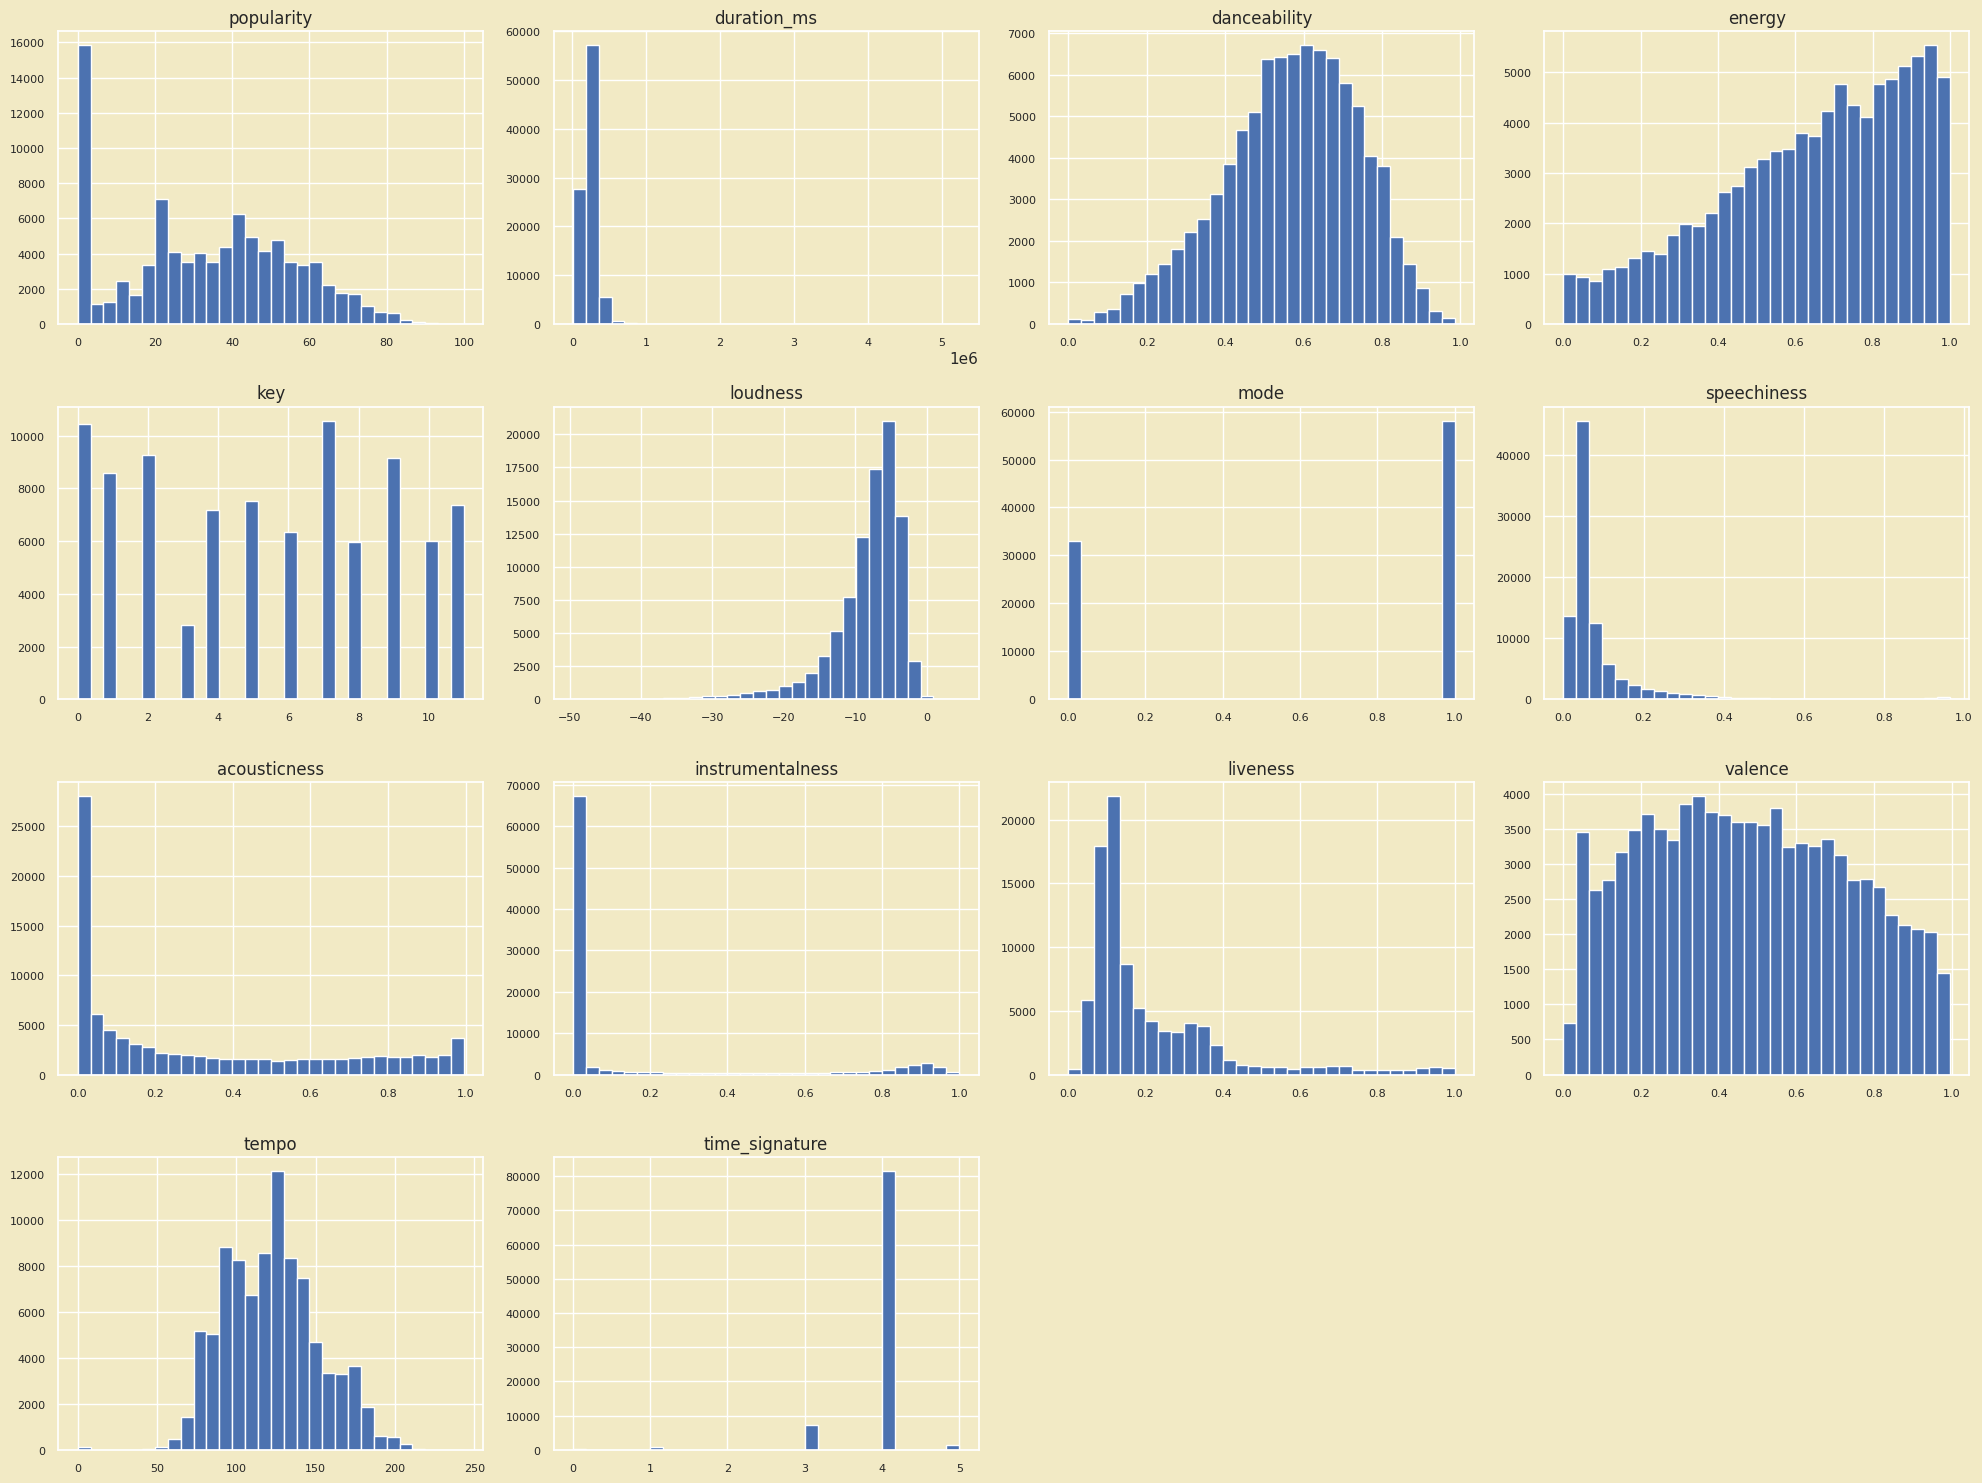

In [ ]:
# Before preprocess the data, let´s plot graphics of the distribution of of the features
import seaborn as sns
import matplotlib.pyplot as plt

# We can only plot the graphs of the numerical features
numerical_cols = x_train[x_train.columns[(x_train.dtypes == 'float64') | (x_train.dtypes == 'int64')]]

sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Preprocessing the features

# Preprocess the boolean 'explicit' feature. True values will become
# 1's and False values will become 2's
x_train['explicit'] = x_train['explicit'].astype(int)
x_test['explicit'] = x_test['explicit'].astype(int)

# Normalize the 'duration_ms' feature, subtracting from the mean and dividing by the
# standart error. We do this because machine learning models are high sensitive by
# the scale of the input values. Note we must use the training data to calculate the
# mean and std error, and never the testing data.
x_train_mean = x_train['duration_ms'].mean()
x_train_std = x_train['duration_ms'].std()
x_train['duration_ms'] = (x_train['duration_ms'] - x_train_mean) / x_train_std
x_test['duration_ms'] = (x_test['duration_ms'] - x_train_mean) / x_train_std

# Performs the same normalization in 'loudness'
x_train_mean = x_train['loudness'].mean()
x_train_std = x_train['loudness'].std()
x_train['loudness'] = (x_train['loudness'] - x_train_mean) / x_train_std
x_test['loudness'] = (x_test['loudness'] - x_train_mean) / x_train_std

# Performs the same normalization in 'tempo'
x_train_mean = x_train['tempo'].mean()
x_train_std = x_train['tempo'].std()
x_train['tempo'] = (x_train['tempo'] - x_train_mean) / x_train_std
x_test['tempo'] = (x_test['tempo'] - x_train_mean) / x_train_std

# Then, we replace the categorical feature 'genre' to 'genre_encoded', using target_encoding.
# To do this, we calculate the mean of the target (popularity) for each one of the genres and
# replaces 'genre' for the value calculated.
mean_encoded = x_train.groupby('track_genre')['popularity'].mean()
x_train['genre_encoded'] = x_train['track_genre'].map(mean_encoded)
x_test['genre_encoded'] = x_test['track_genre'].map(mean_encoded)
x_train.drop(columns=['track_genre'], inplace=True)
x_test.drop(columns=['track_genre'], inplace=True)

# Now, we can drop 'popularity' from x_train
x_train = df_train.drop(['popularity'], axis=1)

# Normalizes the 'genre_encoded' feature
x_train_mean = x_train['genre_encoded'].mean()
x_train_std = x_train['genre_encoded'].std()
x_train['genre_encoded'] = (x_train['genre_encoded'] - x_train_mean) / x_train_std
x_test['genre_encoded'] = (x_test['genre_encoded'] - x_train_mean) / x_train_std

# Let's min-max popularity. This scales the target to the 1(0, 1) range.
def min_max(y):
  return (y - y.min()) / (y.max() - y.min())

y_train = min_max(y_train)
y_test = min_max(y_test)

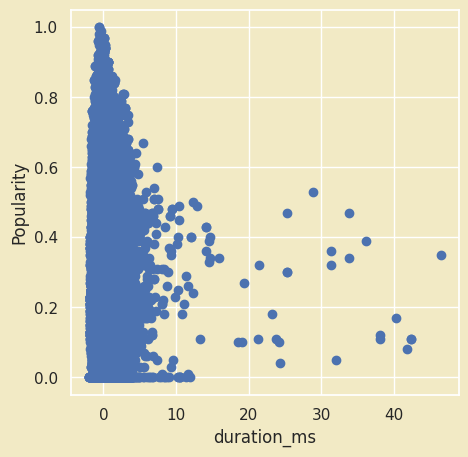

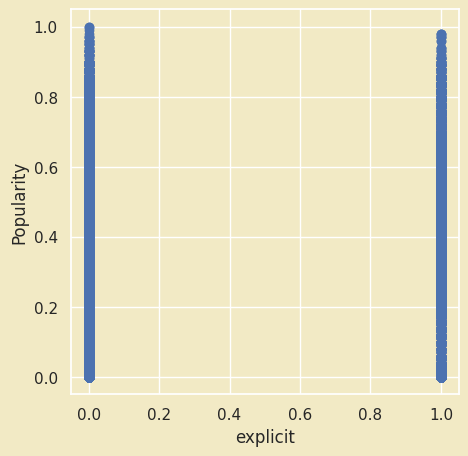

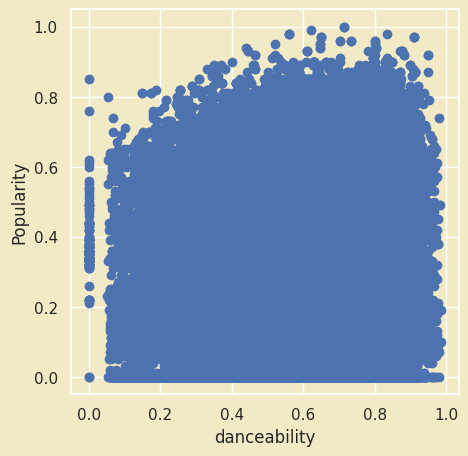

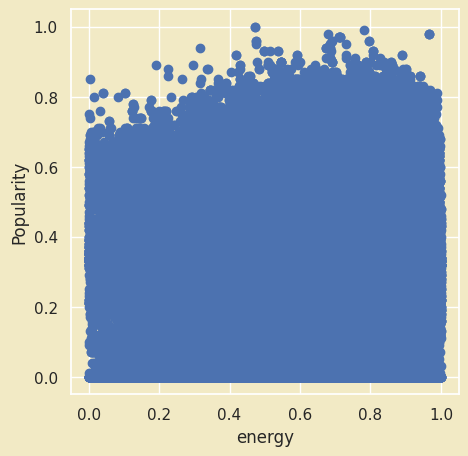

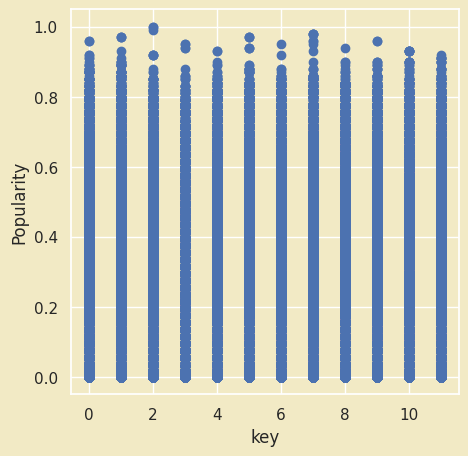

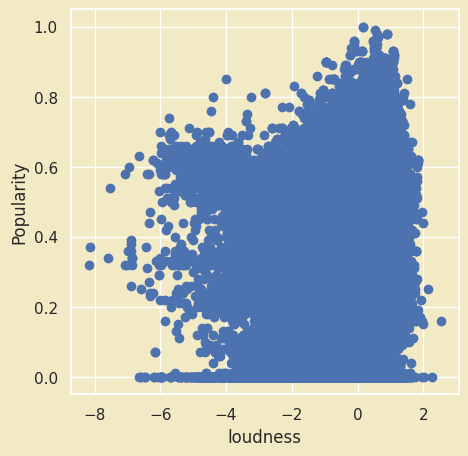

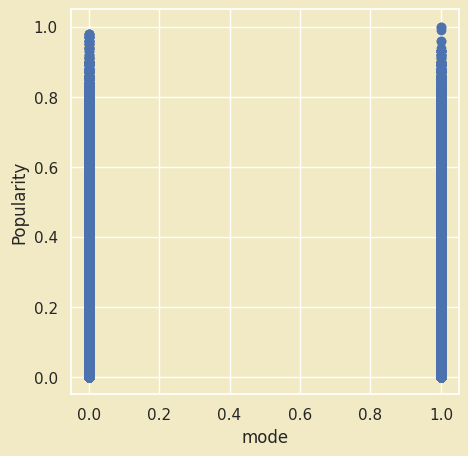

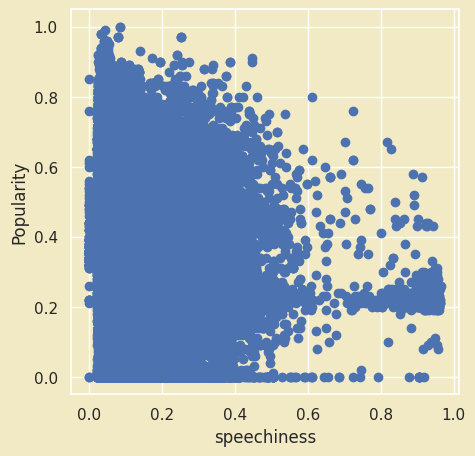

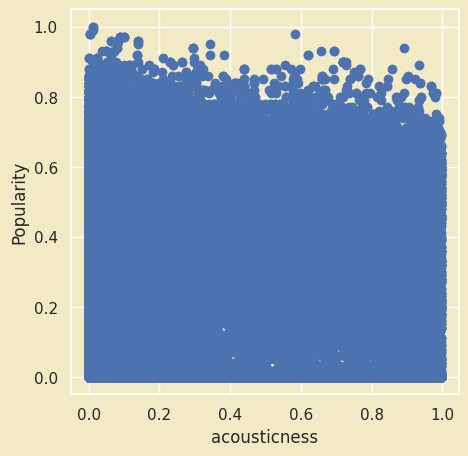

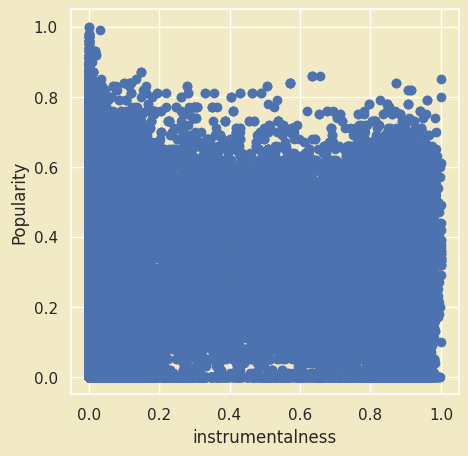

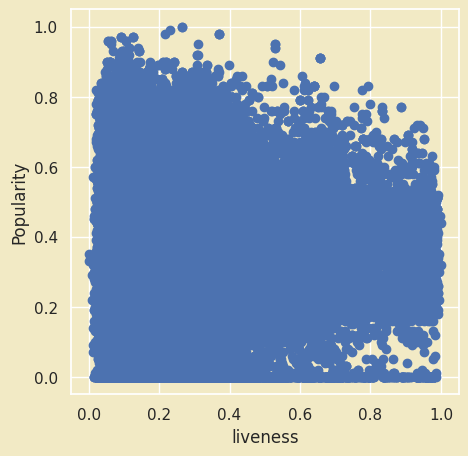

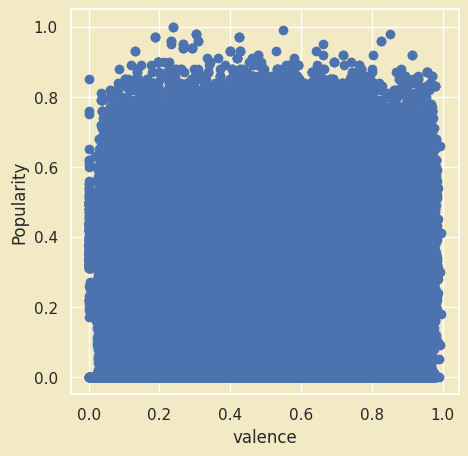

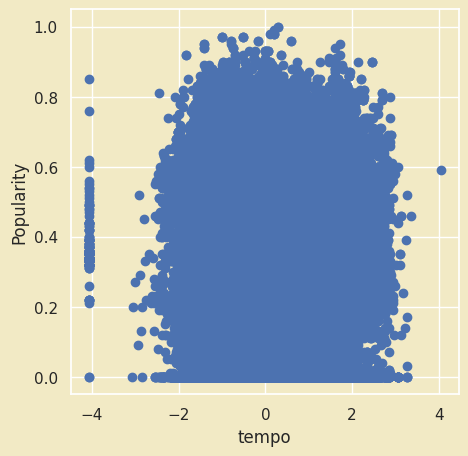

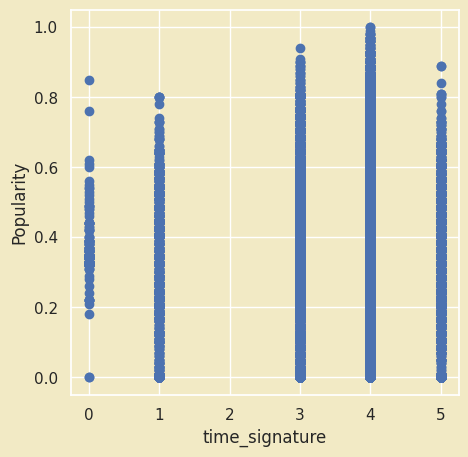

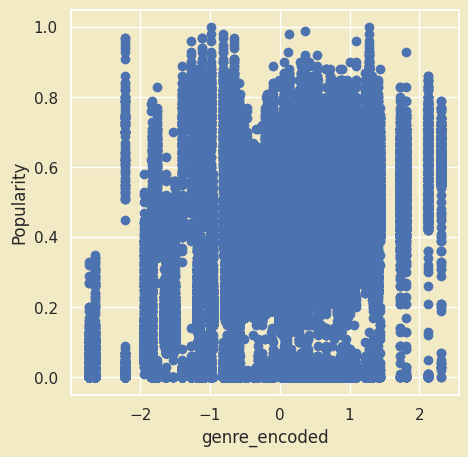

In [ ]:
import matplotlib.pyplot as plt

# Plot a graphic to help understand the feature's relationships with 'popularity'
for column in x_train.columns:
  plt.figure(figsize=(5,5))
  plt.scatter(x_train[column], y_train)
  plt.xlabel(column)
  plt.ylabel('Popularity')
  plt.show();

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


In [ ]:
# Check Mutal information
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(x_train, y_train,
                                     discrete_features=[False, True, False, False, True, False, True, False, False, False, False, False, False, True, False])

# Print the MI values
i = 0
for column in x_train.columns:
    print(f"{column}: {mutual_info[i]}")
    i += 1

duration_ms: 0.3713794761732023
explicit: 0.006285563610428646
danceability: 0.1517907288765068
energy: 0.17882599779392017
key: 0.007127463334310136
loudness: 0.33098328391529996
mode: 0.0037774419459937203
speechiness: 0.16029211176359492
acousticness: 0.26173045021218666
instrumentalness: 0.21940910215661802
liveness: 0.15363177959716356
valence: 0.17597491448661184
tempo: 0.3709047833196566
time_signature: 0.005725183097718967
genre_encoded: 0.8916886851205517


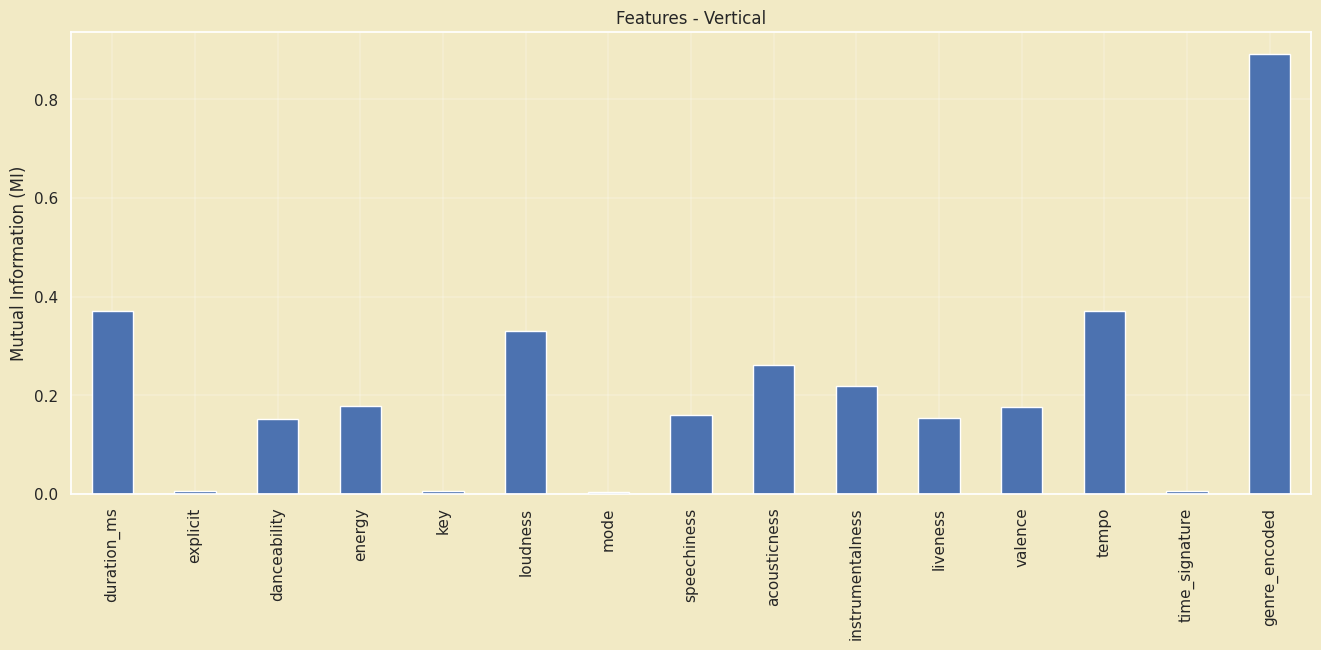

In [ ]:
# Visualize the mutual information of each variable

mt_info_df = pd.Series(mutual_info)
mt_info_df.index = df_train.columns[1:]
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

In [ ]:
# We note that the 'explicit', 'key', 'mode' and 'time_signature' features has very little
# influence in the target 'popularity', so we can drop these columns.

x_train = x_train.drop(columns=['explicit', 'key', 'mode', 'time_signature'])
x_test = x_test.drop(columns=['explicit', 'key', 'mode', 'time_signature'])

#### Discussion of key points

- How the visualization helped in understanding the data?


- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)

01) a) We made three plots of the data:

The first one was the histograms, before the data preprocessing. They showed us the distributions of each feature. For example, we could see that most of the songs have high energy (> 70%) and most of the songs are not popular (popularity < 50%).

b) The second was the plots feature vs popularity. Here we could see the features whose variation don't impact much in the variation of popularity, such as mode.

c) The third was the mutual information graphic. This graphic showed us more clearly what we could notice in the second graphic.

02) Yes, looking at the third graphic, we could see that the features 'key', 'mode', 'time_signature' and 'explicit' don't impact much in the popularity. These features have very low MI with the target.


### **Implement and train a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` metric started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand regression model's perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of the last two metrics (MAE and R²) or use it from sklearn. Compare the three different metrics.

In [ ]:
# Manual implementation of MSE function

def MSE(predicted_y, true_y):
  if len(predicted_y) != len(true_y):
    raise ValueError("The arrays must have the same length")

  return np.mean((np.array(predicted_y) - np.array(true_y)) ** 2)

In [ ]:
# Manual implementation of a linear regressor

class MyLinearRegressor():
  def __init__(self, learning_rate=0.01, max_iter=5000):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # Gradient Descendent
    for _ in range(self.max_iter):
      y_predicted = np.dot(X, self.weights) + self.bias

      # Calculate the gradients
      dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
      db = (1 / n_samples) * np.sum(y_predicted - y)

      # Updating weights and biases
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Training the model, using our own regressor
regressor = MyLinearRegressor()
regressor.fit(x_train, y_train)

# Inference
predictions = regressor.predict(x_test)

# Avaliation of the model
mse = MSE(predictions, y_test)
my_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {my_r2}")

MAE: 0.14474197268987402
MSE: 0.03888351967705336
R^2: 0.24400199647673693


#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?
- Your Linear Regressor was able to closely estimate the amount of miliseconds played? Justify using a machine learning metric.
- What do you think is the biggest error type in your model: variance or bias?

a) The best metric is by far R^2, because it's a metric limited to 1, so we can have a great idea of the model's performance. The other metrics are just real numbers, so it's great to use to compare different models, but don't say much if you don't have another model to compare.

b) Let's use the R^2 which is the best metric for this problem. We have a low R^2, so our model is a bit lame. Problably, the relation between the features and the target are non-linear, so our assumption does not pay off very well.

c) Bias, because it's a linear model. The variance shouldn't be that high, as long as the model isn't flexible.

### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

In [ ]:
# Train a linear regressor using SkLearn libraries
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

model = SGDRegressor()
model.fit(x_train, y_train);

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Inference
predictions = model.predict(x_test)

# Avaliation of the model
mse = MSE(predictions, y_test)
my_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {my_r2}")

MAE: 0.1457276535612139
MSE: 0.03873924236329956
R^2: 0.2468071273408533


### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



In [ ]:
# Reload the dataset
# Link with google drive
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive', force_remount=True)

# Load dataset from google drive
path = '/content/gdrive/My Drive/Colab Notebooks/dataset.csv'
df = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First, we remove the features that wont't be used. These features aren't informative about
# the song popularity, since they are just ID's or names, so our model cannot learn with them.
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)

# We separate the training and testing sets.
# Train: 80%
# Test: 20%
df_train, df_test = train_test_split(df, test_size=0.2, random_state=71)

# Here we separate the x (inputs) and y (labels) from the training and testing sets. We won't drop
# the 'popularity' column from x_train yet, because it will be easy to preprocess the data in that way.
x_train = df_train
y_train = df_train['popularity']
x_test = df_test.drop(['popularity'], axis=1)
y_test = df_test['popularity']

In [ ]:
# Preprocessing the features

# Preprocess the boolean 'explicit' feature. True values will become
# 1's and False values will become 2's
x_train['explicit'] = x_train['explicit'].astype(int)
x_test['explicit'] = x_test['explicit'].astype(int)

# Normalize the 'duration_ms' feature, subtracting from the mean and dividing by the
# standart error. We do this because machine learning models are high sensitive by
# the scale of the input values. Note we must use the training data to calculate the
# mean and std error, and never the testing data.
x_train_mean = x_train['duration_ms'].mean()
x_train_std = x_train['duration_ms'].std()
x_train['duration_ms'] = (x_train['duration_ms'] - x_train_mean) / x_train_std
x_test['duration_ms'] = (x_test['duration_ms'] - x_train_mean) / x_train_std

# Performs the same normalization in 'loudness'
x_train_mean = x_train['loudness'].mean()
x_train_std = x_train['loudness'].std()
x_train['loudness'] = (x_train['loudness'] - x_train_mean) / x_train_std
x_test['loudness'] = (x_test['loudness'] - x_train_mean) / x_train_std

# Performs the same normalization in 'tempo'
x_train_mean = x_train['tempo'].mean()
x_train_std = x_train['tempo'].std()
x_train['tempo'] = (x_train['tempo'] - x_train_mean) / x_train_std
x_test['tempo'] = (x_test['tempo'] - x_train_mean) / x_train_std

# Then, we replace the categorical feature 'genre' to 'genre_encoded', using target_encoding.
# To do this, we calculate the mean of the target (popularity) for each one of the genres and
# replaces 'genre' for the value calculated.
mean_encoded = x_train.groupby('track_genre')['popularity'].mean()
x_train['genre_encoded'] = x_train['track_genre'].map(mean_encoded)
x_test['genre_encoded'] = x_test['track_genre'].map(mean_encoded)
x_train.drop(columns=['track_genre'], inplace=True)
x_test.drop(columns=['track_genre'], inplace=True)

# Now, we can drop 'popularity' from x_train
x_train = df_train.drop(['popularity'], axis=1)

# Normalizes the 'genre_encoded' feature
x_train_mean = x_train['genre_encoded'].mean()
x_train_std = x_train['genre_encoded'].std()
x_train['genre_encoded'] = (x_train['genre_encoded'] - x_train_mean) / x_train_std
x_test['genre_encoded'] = (x_test['genre_encoded'] - x_train_mean) / x_train_std


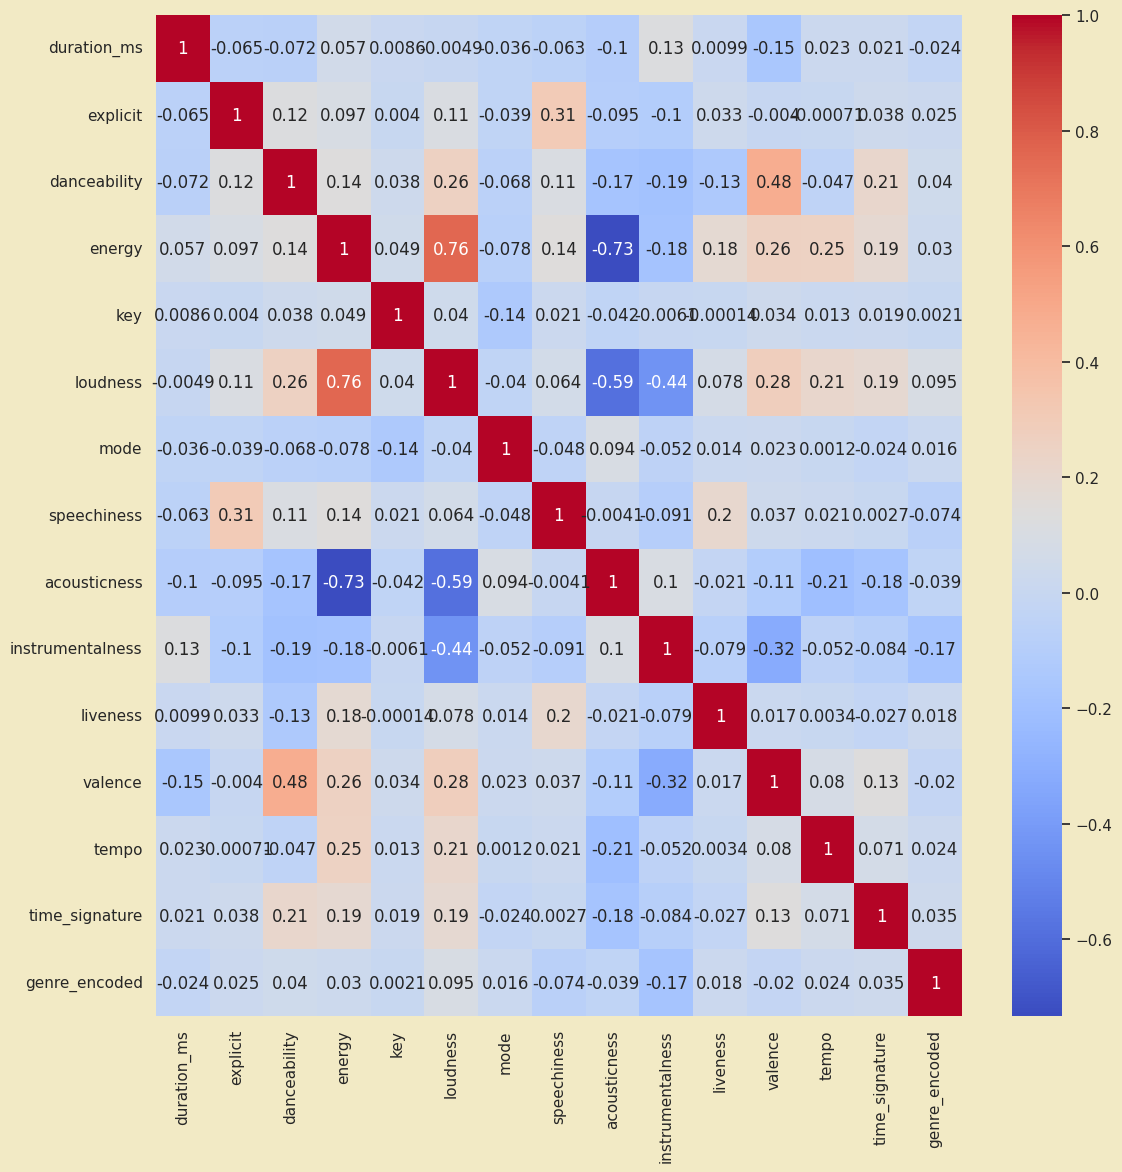

In [ ]:
# Check mutual information
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

corr_matrix = x_train.corr()
plt.figure(figsize = (13,13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Delete the features with high correlation
# We will drop just energy, because it's the only feature who has correlation
# greater than 70% (with acousticness)

x_train = x_train.drop(columns=['energy'])
x_test = x_test.drop(columns=['energy'])

In [ ]:
# Re-train and test the model
from sklearn.metrics import r2_score

# Fitting the model
regressor = MyLinearRegressor()
regressor.fit(x_train, y_train)

# Inference
predictions = regressor.predict(x_test)

# Avaliation of the model
mse = MSE(predictions, y_test)
my_r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {my_r2}")

MAE: 14.243755534232037
MSE: 374.11182129869604
R^2: 0.24263652132968638


## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: Kickstarter Projects**

I'm a crowdfunding enthusiast and i'm watching kickstarter since its early days. Right now I just collect data and the only app i've made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher . I have a lot of other ideas, but sadly not enough time to develop them… But I hope you can!


https://www.kaggle.com/datasets/kemical/kickstarter-projects


| Variable Name | Data Type | Description | Example Value |
|---|---|---|---|
| `ID` | Integer | Unique identifier for the project | `1000002330` |
| `name` | String | Name of the project | `"The Songs of Adelaide & Abullah"` |
| `category` | String | Category of the project (e.g., "Publishing", "Film & Video", "Music") | `"Publishing"` |
| `main_category` | String | Main category of the project (e.g., "Art", "Technology", "Games") | `"Art"` |
| `currency` | String | Currency used for the funding goal | `"GBP"` |
| `deadline` | Date | Date the project funding period ended | `"2015-10-09"` |
| `goal` | Float | Funding goal in the project's currency | `1000.0` |
| `launched` | Date | Date the project was launched | `"2015-08-11 12:12:28"` |
| `pledged` | Float | Total amount pledged in the project's currency | `0.0` |
| `state` | String | State of the project (e.g., "failed", "successful", "canceled") | `"failed"` |
| `backers` | Integer | Number of backers who pledged to the project | `0` |
| `country` | String | Country where the project is based | `"GB"` |
| `usd pledged` | Float | Total amount pledged in US dollars (converted) | `0.0` |
| `usd_pledged_real` | Float | Total amount pledged in US dollars (converted using a different API) | `0.0` |
| `usd_goal_real` | Float | Funding goal in US dollars (converted using a different API) | `1533.95` |

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [ ]:
# Link with google drive
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive', force_remount=True)

# Load dataset from google drive
path = '/content/gdrive/My Drive/Colab Notebooks/ks-projects.csv'
df = pd.read_csv(path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First, we remove the features that cannot be used
df = df.drop(['ID', 'name'], axis=1)

# Drop the rows with any NaN
df = df.dropna()

# Train-test split
# Train: 80%
# Test: 20%
df_train, df_test = train_test_split(df, test_size=0.2, random_state=71)

# Here we separate the x and y training and testing sets
x_train = df_train.drop(['state'], axis=1)
x_test = df_test.drop(['state'], axis=1)
y_train = df_train['state']
y_test = df_test['state']

In [ ]:
# Preprocess the features

# Subtract 'deadline' - 'launched' to make a new column, called timeset
x_train['timeset'] = pd.to_datetime(x_train['deadline']) - pd.to_datetime(x_train['launched'])
x_test['timeset'] = pd.to_datetime(x_test['deadline']) - pd.to_datetime(x_test['launched'])
x_train = x_train.drop(['deadline', 'launched'], axis=1)
x_test = x_test.drop(['deadline', 'launched'], axis=1)

# Transform the timeset in an int, counting the number of days
x_train['timeset'] = x_train['timeset'].dt.days
x_test['timeset'] = x_test['timeset'].dt.days

# Normalize the timeset feature
x_train_mean = x_train['timeset'].mean()
x_train_std = x_train['timeset'].std()
x_train['timeset'] = (x_train['timeset'] - x_train_mean) / x_train_std
x_test['timeset'] = (x_test['timeset'] - x_train_mean) / x_train_std

# Normalize the goal
x_train_mean = x_train['goal'].mean()
x_train_std = x_train['goal'].std()
x_train['goal'] = (x_train['goal'] - x_train_mean) / x_train_std
x_test['goal'] = (x_test['goal'] - x_train_mean) / x_train_std

# Normalize the backers
x_train_mean = x_train['backers'].mean()
x_train_std = x_train['backers'].std()
x_train['backers'] = (x_train['backers'] - x_train_mean) / x_train_std
x_test['backers'] = (x_test['backers'] - x_train_mean) / x_train_std

In [ ]:
# Transforms the categorical 'state' feature to a number
target_mapping = {
    'others' : 0,
    'successful' : 1
}

y_train = y_train.replace({'successful': 'successful'})
y_train = y_train.where(y_train.isin(['successful']), 'others')
y_train = y_train.map(target_mapping).apply(pd.Series)

y_test = y_test.replace({'successful': 'successful'})
y_test = y_test.where(y_test.isin(['successful']), 'others')
y_test= y_test.map(target_mapping).apply(pd.Series)

In [ ]:
# Let's do ordinal encodings in the categorical features, so we
# can get the mutual information of the features
from sklearn.preprocessing import OrdinalEncoder

# Let's create a copy of x_train, so the original set won't be
# affected by the encoding
x_train_copy = x_train.copy()

# Let's encode 'main'_category', 'category', 'country' and 'currency'
encoder = OrdinalEncoder()
x_train_copy['category'] = encoder.fit_transform(x_train_copy[['category']])
x_train_copy['main_category'] = encoder.fit_transform(x_train_copy[['main_category']])
x_train_copy['country'] = encoder.fit_transform(x_train_copy[['country']])
x_train_copy['currency'] = encoder.fit_transform(x_train_copy[['currency']])

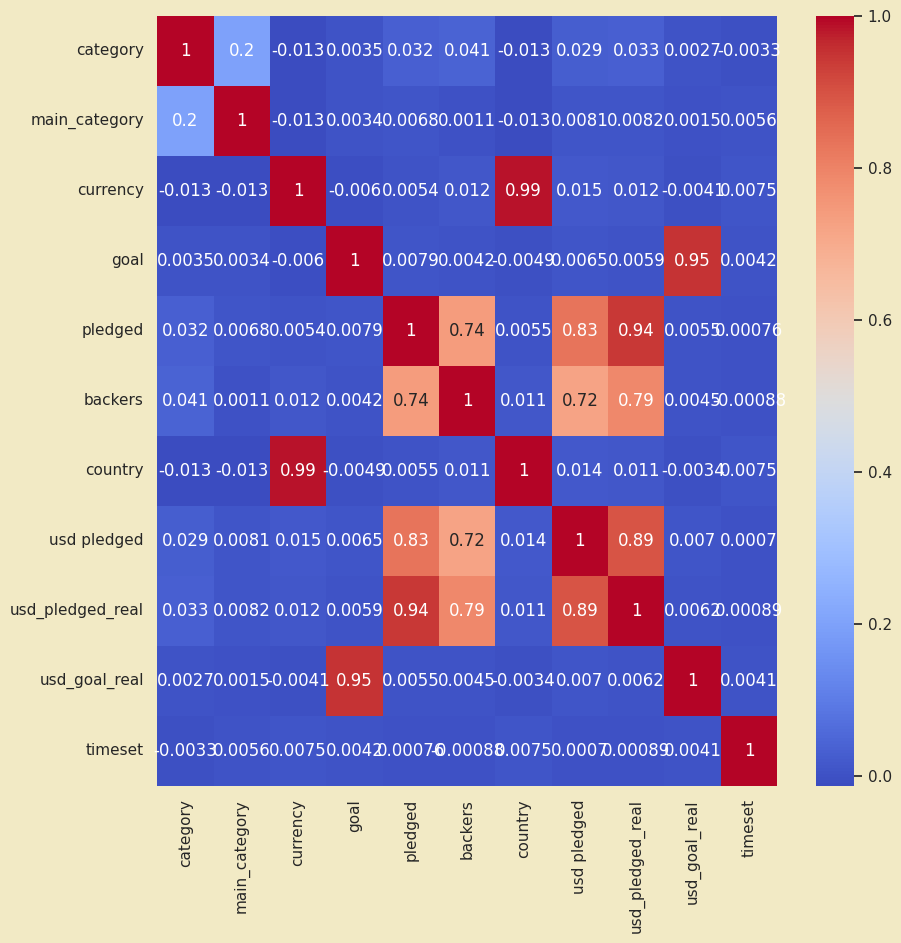

In [ ]:
# Let's display the correlation matrix

corr_matrix = x_train_copy.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# From the correlation matrix, we could see the features with high MI.
# Then, we can safely drop them
x_train = x_train.drop(columns=['usd pledged', 'usd_pledged_real', 'usd_goal_real','pledged', 'currency'])
x_test = x_test.drop(columns=['usd pledged', 'usd_pledged_real', 'usd_goal_real', 'pledged', 'currency'])

In [ ]:
# Now, in does one hot encoding in the original x_train set

# One Hot encoding in main_category
x_train = pd.get_dummies(x_train, columns=['main_category'])
x_test = pd.get_dummies(x_test, columns=['main_category'])

# One Hot encoding in category
x_train = pd.get_dummies(x_train, columns=['category'])
x_test = pd.get_dummies(x_test, columns=['category'])

# One hot encoding in country
x_train = pd.get_dummies(x_train, columns=['country'])
x_test = pd.get_dummies(x_test, columns=['country'])

#### Discussion of key points

- There were missing values in the dataset? How did you dealt with each one?
-~Changing the missing values impacted in the mutual information of features with the target?~ => DO NOT ANSWER, there is no way to calculate Mutual Informations with missing values.

a) Because there are few lines that have NaN values (less than 1%), we decided to simply drop out these rows.

### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Training the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train.values.ravel());

# Inference
predictions = model.predict(x_test)

# Evaluation of accuracy
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.8859589452202793


In [ ]:
# Verify the accuracy of a random classifier to see
# how much our model is actually learning
from sklearn.dummy import DummyClassifier

model = DummyClassifier(random_state=42)
model.fit(x_train, y_train);

predictions = model.predict(x_test)
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.6466194496685473


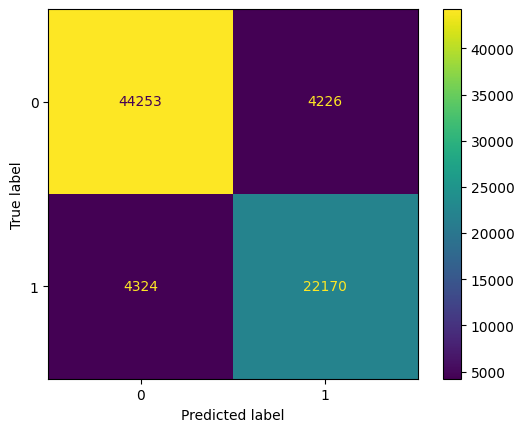

In [ ]:
# Prints the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix)
display.plot()
plt.show()

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

a) Yes, because the classes are well separated.

b) The confusion matrix shows the number of false positives and false negatives are almost equal. The number of true negatives are greater than the number of true positives, but it's because of the frequency of the classes in our dataset.

c) The greater the K, less flexible the model is, so the bias is greater. The lesser the K, more flexible it is, so the variance gets bigger. For this problem, the best value of K was 5.

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Spotify Song Attributes**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of rate of played time w.r.t. the time of the song.<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum rate in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

In [ ]:
# Link with google drive
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive', force_remount=True)

# Load dataset from google drive
path = '/content/gdrive/My Drive/Colab Notebooks/dataset.csv'
df = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# First, we remove the features that wont't be used. These features aren't informative about
# the song popularity, since they are just ID's or names, so our model cannot learn with them.
df = df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'], axis=1)

# We separate the training and testing sets.
# Train: 80%
# Test: 20%
df_train, df_test = train_test_split(df, test_size=0.2, random_state=71)

# Here we separate the x (inputs) and y (labels) from the training and testing sets. We won't drop
# the 'popularity' column from x_train yet, because it will be easy to preprocess the data in that way.
x_train = df_train
y_train = df_train['popularity']
x_test = df_test.drop(['popularity'], axis=1)
y_test = df_test['popularity']

In [ ]:
# Preprocessing the features

# Preprocess the boolean 'explicit' feature. True values will become
# 1's and False values will become 2's
x_train['explicit'] = x_train['explicit'].astype(int)
x_test['explicit'] = x_test['explicit'].astype(int)

# Normalize the 'duration_ms' feature, subtracting from the mean and dividing by the
# standart error. We do this because machine learning models are high sensitive by
# the scale of the input values. Note we must use the training data to calculate the
# mean and std error, and never the testing data.
x_train_mean = x_train['duration_ms'].mean()
x_train_std = x_train['duration_ms'].std()
x_train['duration_ms'] = (x_train['duration_ms'] - x_train_mean) / x_train_std
x_test['duration_ms'] = (x_test['duration_ms'] - x_train_mean) / x_train_std

# Performs the same normalization in 'loudness'
x_train_mean = x_train['loudness'].mean()
x_train_std = x_train['loudness'].std()
x_train['loudness'] = (x_train['loudness'] - x_train_mean) / x_train_std
x_test['loudness'] = (x_test['loudness'] - x_train_mean) / x_train_std

# Performs the same normalization in 'tempo'
x_train_mean = x_train['tempo'].mean()
x_train_std = x_train['tempo'].std()
x_train['tempo'] = (x_train['tempo'] - x_train_mean) / x_train_std
x_test['tempo'] = (x_test['tempo'] - x_train_mean) / x_train_std

# Then, we replace the categorical feature 'genre' to 'genre_encoded', using target_encoding.
# To do this, we calculate the mean of the target (popularity) for each one of the genres and
# replaces 'genre' for the value calculated.
mean_encoded = x_train.groupby('track_genre')['popularity'].mean()
x_train['genre_encoded'] = x_train['track_genre'].map(mean_encoded)
x_test['genre_encoded'] = x_test['track_genre'].map(mean_encoded)
x_train.drop(columns=['track_genre'], inplace=True)
x_test.drop(columns=['track_genre'], inplace=True)

# Now, we can drop 'popularity' from x_train
x_train = df_train.drop(['popularity'], axis=1)

# Normalizes the 'genre_encoded' feature
x_train_mean = x_train['genre_encoded'].mean()
x_train_std = x_train['genre_encoded'].std()
x_train['genre_encoded'] = (x_train['genre_encoded'] - x_train_mean) / x_train_std
x_test['genre_encoded'] = (x_test['genre_encoded'] - x_train_mean) / x_train_std


In [ ]:
# Gets the min and max values of popularity in the training set
max_rate = y_train.max()
min_rate = y_train.min()

# Define the intervals boundaries
interval_1 = (max_rate - min_rate) / 3
interval_2 = 2 * interval_1

# Function to create the classes
def classify_rate(rate):
    if rate <= interval_1:
        return 0
    elif rate <= interval_2:
        return 1
    else:
        return 2

# Apply the function, transforming 'popularity'
# in a multiclass feature
y_train = y_train.apply(classify_rate)
y_test = y_test.apply(classify_rate)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Training the model
model = KNeighborsClassifier()
model.fit(x_train, y_train);

In [ ]:
from sklearn.metrics import accuracy_score

# Inference
predictions = model.predict(x_test)

# Evaluation of model accuracy
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.7044736842105264


In [ ]:
# Verify the accuracy of a random classifier to see
# how much our model is actually learning
from sklearn.dummy import DummyClassifier

# Training the model
model = DummyClassifier(strategy='most_frequent')
model.fit(x_train, y_train);

# Inference
predictions = model.predict(x_test)

# Evaluation of model accuracy
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

Accuracy: 0.5305376602243475


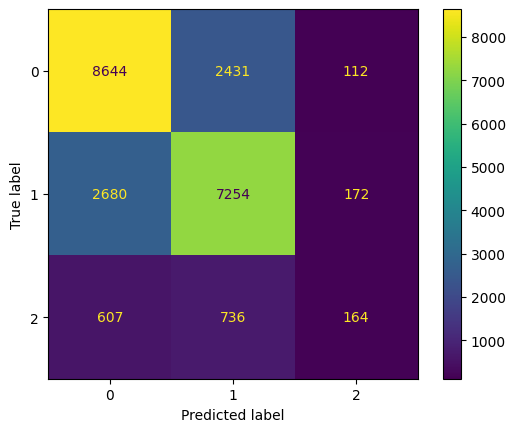

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, predictions)
display = ConfusionMatrixDisplay(confusion_matrix)
display.plot()
plt.show()

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- There is value in solve a regression problem as a multiclass classification problem?

a) Yes, the accuracy is a good starting point to the analysis of the model, because all the classes have the same importance and there's no weights related with false positives or negatives, like in other metrics.

b) The matrix has great tendence to predict songs being popularity equal zero or one, but there's very few predictions of level two popularity. This is because the classes are unbalanced, that is, there's few very popular songs in the dataset, so the model may not have learned to classify them well.

c) Yes, treating a regression problem as a multiclass classification problem increases the interpretability of the results.  Besides, we can see that the linear regression model has a poor performance. However, on the same dataset, we can have a well performing KNN classifier changing our problem to a classification one.